In [ ]:
#based on yhat tutorial from 2013 http://blog.yhathq.com/posts/logistic-regression-and-python.html

In [39]:
import pandas
import numpy as np
import statsmodels as sm 
import pylab as pl
import matplotlib 

%matplotlib inline

In [3]:
df = pandas.read_csv("binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df.columns=['admit', 'gre', 'gpa', 'prestige']

In [66]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [5]:
pandas.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108e97710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1091c5a10>]], dtype=object)

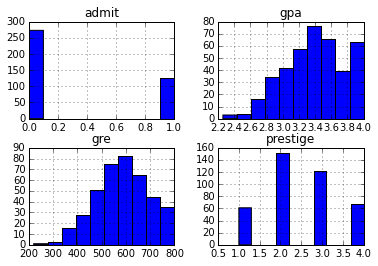

In [6]:
df.hist()

In [7]:
#dummify prestige (4 levels, they want to show how to treat as categorical)
dummy_ranks = pandas.get_dummies(df['prestige'], prefix='prestige')
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [8]:
keepcols = ['admit', 'gre', 'gpa']
df2 = df[keepcols].join(dummy_ranks.ix[:, 'prestige_2':])
df2.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [9]:
#manually add the 'intercept' b/c statsmodels needs it defined explicitly 
df2['intercept'] = 1.0
df2.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0,1,0,1
1,1,660,3.67,0,1,0,1
2,1,800,4.00,0,0,0,1
3,1,640,3.19,0,0,1,1
4,0,520,2.93,0,0,1,1


In [15]:
#treat prestige_1 as 'baseline' and exclude it from the fit to prevent multicolinearity 
train_cols = df2.columns[1:]

logit = sm.discrete.discrete_model.Logit(df2['admit'], df2[train_cols])

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 May 2015   Pseudo R-squ.:                 0.08292
Time:                        17:49:12   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038         0.000     0.004
gpa            0.8040      0.332      2.423      0.015         0.154     1.454
prestige_2    -0.6754      0.316     -2.134      0.033        -1.296    -0.055
prestige_3    -1.3402      0.345     -3.881      0.000        -2.017    -0.663
prestige_4    -1.5515      0.418     -3.713      0.000        -2.370    -0.733
intercept     -3.9900      1.140     -3.500      0.000        -6.224    -1.756
==============================================================================
"""

In [18]:
np.exp(result.params)

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64

In [20]:
#odds ratio and 95% CI
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
np.exp(conf)

,0,1,Odds Ratio
gre,1.000120,1.004418,1.002267
gpa,1.166122,4.281877,2.234545
prestige_2,0.273692,0.946358,0.508931
prestige_3,0.133055,0.515089,0.261792
prestige_4,0.093443,0.480692,0.211938
intercept,0.001981,0.172783,0.018500


https://en.wikipedia.org/wiki/Odds_ratio#/media/File:Odds_ratio_map.svg
https://en.wikipedia.org/wiki/Forest_plot
http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm

In [23]:
#generate representative GRE and GPA values
gres = np.linspace(df2['gre'].min(), df2['gre'].max(), 10)
gres

array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
        477.77777778,  542.22222222,  606.66666667,  671.11111111,
        735.55555556,  800.        ])

In [67]:
gpas = np.linspace(df2['gpa'].min(), df2['gpa'].max(), 10)
gpas

array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
        3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])

In [68]:
#enumerate combinations
from sklearn.utils.extmath import cartesian
combos = pandas.DataFrame(cartesian([gres,gpas,[1,2,3,4],[1.]]))

In [69]:
combos.columns=['gre','gpa','prestige','intercept']
combos.head()

,gre,gpa,prestige,intercept
0,220,2.260000,1,1
1,220,2.260000,2,1
2,220,2.260000,3,1
3,220,2.260000,4,1
4,220,2.453333,1,1


In [70]:
dummy_ranks = pandas.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns=['prestige_1','prestige_2','prestige_3','prestige_4']

In [71]:
#note that I think there is more than one easier/clearer way to do this in pandas now
cols_to_keep = ['gre', 'gpa','prestige','intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:,'prestige_2':])

In [72]:
#make predictions
combos['admit_pred']=result.predict(combos[train_cols])
combos.head()

,gre,gpa,prestige,intercept,prestige_2,prestige_3,prestige_4,admit_pred
0,220,2.260000,1,1,0,0,0,0.157801
1,220,2.260000,2,1,1,0,0,0.087056
2,220,2.260000,3,1,0,1,0,0.046758
3,220,2.260000,4,1,0,0,1,0.038194
4,220,2.453333,1,1,0,0,0,0.179574


In [73]:
#make pivot table
gre_pivot = pandas.pivot_table(combos, values=['admit_pred'], index=['gre', 'prestige'], aggfunc=np.mean)

In [74]:
gre_pivot.head()

admit_pred
gre        prestige            
220.000000 1           0.282462
           2           0.169987
           3           0.096544
           4           0.079859
284.444444 1           0.311718

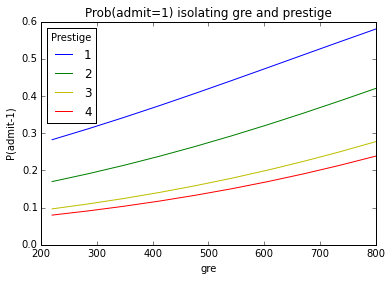

In [75]:
#make gre plot
colors = 'rbgyrbgy'
for col in combos.prestige.unique():
    plt_data = gre_pivot.ix[gre_pivot.index.get_level_values(1)==col]
    pl.plot(plt_data.index.get_level_values(0),plt_data['admit_pred'],color=colors[int(col)])

pl.xlabel('gre')
pl.ylabel("P(admit-1)")
pl.legend(['1','2','3','4'],loc='upper left', title='Prestige')
pl.title('Prob(admit=1) isolating ' + 'gre' + ' and prestige')
pl.show()

In [76]:
#make a gpa pivot table
gpa_pivot = pandas.pivot_table(combos, values=['admit_pred'], index=['gpa', 'prestige'], aggfunc=np.mean)
gpa_pivot.tail()

admit_pred
gpa      prestige            
3.806667 4           0.218079
4.000000 1           0.590321
         2           0.429914
         3           0.284611
         4           0.244885

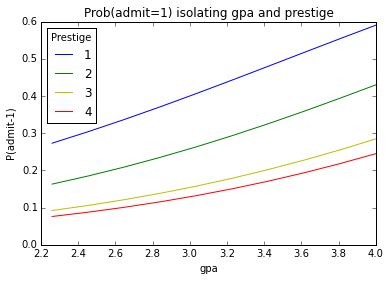

In [78]:
#make gpa plot
colors = 'rbgyrbgy'
for col in combos.prestige.unique(): #ok, wow, have to use 'col' as the variable or this doesn't work?? I don't get it. 
    plt_data = gpa_pivot.ix[gpa_pivot.index.get_level_values(1)==col]
    pl.plot(plt_data.index.get_level_values(0),plt_data['admit_pred'],color=colors[int(col)])

pl.xlabel('gpa')
pl.ylabel("P(admit-1)")
pl.legend(['1','2','3','4'],loc='upper left', title='Prestige')
pl.title('Prob(admit=1) isolating ' + 'gpa' + ' and prestige')
pl.show()